In [2]:

import sys
sys.path.append('../toolkit')
import time

from iot_grabber import IotGrabber # type: ignore
from matplotlib import pyplot as plt
import pandas as pd
import mplcursors

14:05:03.156721 [ IOT ] IoT Server at 100.113.141.113 initialized
14:05:03.156721 [ IOT ] Current directory before change: x:\git\LRZ\masters-thesis\evaluation
14:05:03.156721 [ IOT ] Current directory after change:  x:\git\LRZ\masters-thesis\evaluation
14:05:03.263867 [ IOT ] Response for 'MPC_DEMAND' saved successfully!
14:05:03.335162 [ IOT ] Response for 'MPC_SUPIM' saved successfully!
14:05:03.407818 [ IOT ] Response for 'MPC_POWER_TAREGT_0' saved successfully!
14:05:03.471736 [ IOT ] Response for 'MPC_DEMAND_PREDICTION' saved successfully!
14:05:03.545291 [ IOT ] Response for 'MPC_SUPIM_PREDICTION' saved successfully!
14:05:03.618708 [ IOT ] Response for 'E3DC0SOC' saved successfully!
14:05:03.676557 [ IOT ] Request failed with status code 404
14:05:03.734989 [ IOT ] Request failed with status code 404
14:05:03.791608 [ IOT ] Request failed with status code 404


<function matplotlib.pyplot.show(close=None, block=None)>

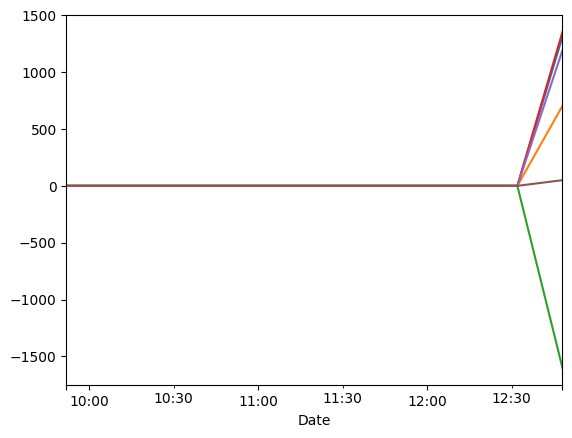

In [3]:
iot_server = IotGrabber(ip="100.113.141.113", 
                        verbose=True,
                        range="3h",
                        res="16m",
                        time_abs_start="2024-11-22T00:00:00Z",
                        time_abs_end  ="2024-11-22T23:59:00Z",
                        devices=["MPC_DEMAND", 
                                 "MPC_SUPIM", 
                                 "MPC_POWER_TAREGT_0", 
                                 "MPC_DEMAND_PREDICTION", 
                                 "MPC_SUPIM_PREDICTION",
                                 "E3DC0SOC",
                                 "E3DC1POWER_AC0",
                                 "E3DC1POWER_AC1",
                                 "E3DC1POWER_AC2"
                                 ])

df = iot_server.get_df()
df.plot(legend=False)
mplcursors.cursor()
plt.show

In [32]:
import os
print(os.environ["PATH"])
s = os.pathsep
time.time()

x:\git\LRZ\masters-thesis\.venv\Scripts;D:\_weitere\Programme\VMware_Workstation_17_Player\bin\;C:\windows\system32;C:\windows;C:\windows\System32\Wbem;C:\windows\System32\WindowsPowerShell\v1.0\;C:\windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\Git\cmd;D:\_weitere\Programme\TortoiseGit\bin;C:\Program Files (x86)\Common Files\Adobe\AGL;D:\_weitere\Programme\MATLAB\R2023b\bin;C:\Program Files\WireGuard\;C:\Program Files\Tailscale\;C:\Users\BeneDesktop\AppData\Local\Programs\Python\Python310\Scripts\;C:\Users\BeneDesktop\AppData\Local\Programs\Python\Python310\;C:\Users\BeneDesktop\AppData\Local\Microsoft\WindowsApps;D:\_weitere\Programme\Microsoft VS Code\bin;C:\Users\BeneDesktop\AppData\Local\Programs\MiKTeX\miktex\bin\x64\;C:\glpk-4.65\w64;


1732028651.4021685

In [17]:
int(len(df.index)/2 + 2)

46

<function matplotlib.pyplot.show(close=None, block=None)>

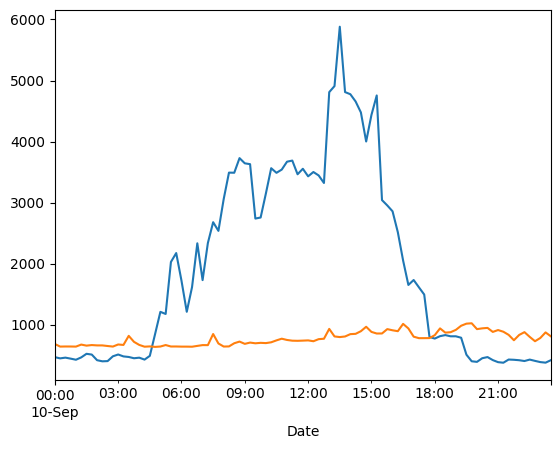

In [4]:
iot_server = IotGrabber(ip="100.113.141.113", 
                        verbose=False,
                        # range="6h",
                        res="15m",
                        time_abs_start="2024-09-10T00:00:00Z",
                        time_abs_end  ="2024-09-10T23:59:00Z",
                        devices=["SHELLY_API_FLOOR_POWER",
                                 "SHELLY_API_SERVERROOM_POWER"
                                 ])

df = iot_server.get_df()
df.plot(legend=False)
mplcursors.cursor()
plt.show

<Axes: xlabel='time'>

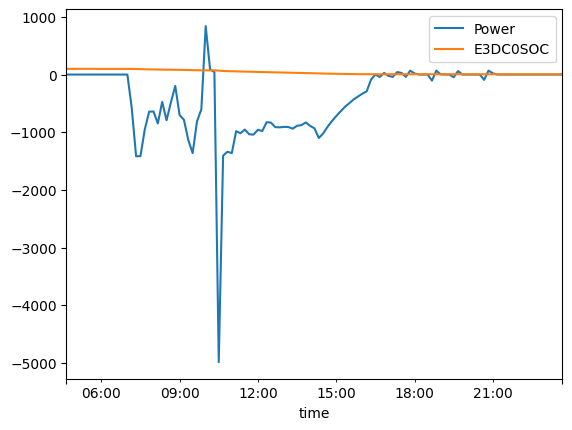

In [46]:
df_new = pd.DataFrame()
df_new["time"] = df.index
df_new.set_index("time", inplace=True)
df_new["Power"] = (df.E3DC1POWER_AC0.values+df.E3DC1POWER_AC1.values+df.E3DC1POWER_AC2.values)
df_new["E3DC0SOC"] = df.E3DC0SOC.values
df_new.to_csv("power-over-soc-subplots.csv", sep=";")
df_new.plot()
# time = df_open.Date.values

In [53]:
df_new.iloc[:,1].values

array([99.        , 99.        , 99.        , 99.        , 99.        ,
       99.        , 99.        , 98.29261745, 98.        , 98.        ,
       98.        , 98.        , 98.        , 98.        , 98.        ,
       97.78154681, 95.62755798, 93.27595628, 91.01933702, 89.72790055,
       88.50771388, 87.16759777, 85.93074792, 84.53314121, 83.42236842,
       82.69849932, 81.78683834, 80.12536023, 78.29124821, 76.03802817,
       74.66149506, 72.7553041 , 72.57549858, 73.        , 72.32737276,
       67.98767123, 62.03159341, 59.55281207, 56.96844993, 54.70013755,
       52.92318244, 50.97799175, 49.05427408, 47.11444142, 45.00273598,
       43.22683264, 41.36299435, 39.65673759, 37.96610169, 36.08819346,
       34.31623932, 32.51857143, 30.56534091, 28.8258427 , 27.12517581,
       25.42291372, 23.63800277, 21.84594223, 19.94101124, 17.90240453,
       16.01931034, 14.49930652, 12.89986283, 11.6075419 , 10.36438356,
        9.2231405 ,  8.15268226,  7.32506887,  6.49728997,  6.  